In [88]:
using FFTW, LinearAlgebra
using BenchmarkTools
using Plots
gr()

┌ Info: Recompiling stale cache file /Users/navaro/.julia/compiled/v1.0/BenchmarkTools/ZXPQo.ji for BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1190


Plots.GRBackend()

In [89]:
function read_refdata(epsilon, dataset)

    str0 = ["", "donnees_cubique_128_micmac/",
            "donnees_FS_128_micmac/",
            "donnees_data3_128_micmac/"]

    str3 = "donnee_"
    str5 = ".txt"

    if (epsilon == 10       )  str4 = "10"        end
    if (epsilon == 5        )  str4 = "5"         end
    if (epsilon == 2.5      )  str4 = "2_5"       end
    if (epsilon == 1        )  str4 = "1"         end
    if (epsilon == 0.5      )  str4 = "0_5"       end
    if (epsilon == 0.2      )  str4 = "0_2"       end
    if (epsilon == 0.25     )  str4 = "0_25"      end
    if (epsilon == 0.1      )  str4 = "0_1"       end
    if (epsilon == 0.05     )  str4 = "0_05"      end
    if (epsilon == 0.025    )  str4 = "0_025"     end
    if (epsilon == 0.01     )  str4 = "0_01"      end
    if (epsilon == 0.005    )  str4 = "0_005"     end
    if (epsilon == 0.0025   )  str4 = "0_0025"    end
    if (epsilon == 0.001    )  str4 = "0_001"     end
    if (epsilon == 0.0005   )  str4 = "0_0005"    end
    if (epsilon == 0.00025  )  str4 = "0_00025"   end
    if (epsilon == 0.0001   )  str4 = "0_0001"    end
    if (epsilon == 0.00005  )  str4 = "0_00005"   end
    if (epsilon == 0.000025 )  str4 = "0_000025"  end
    if (epsilon == 0.00001  )  str4 = "0_00001"   end
    if (epsilon == 0.000005 )  str4 = "0_000005"  end
    if (epsilon == 0.0000025)  str4 = "0_0000025" end
    if (epsilon == 0.000001 )  str4 = "0_000001"  end

    ref_file = joinpath("test", str0[dataset], str3 * str4 * str5)

    uv = zeros(Float64, (4, 128))

    open(ref_file) do f

        for (j,line) in enumerate(eachline(f))
            for (i, val) in enumerate( [ parse(Float64, val) for val in split(line)]) 
                uv[i, j] = val
            end
        end

    end

    nx   = size(u)[2]
    xmin = 0
    xmax = 2π
    T    = 2π
    t    = 0.25

    dx = (xmax - xmin) / nx
    x  = collect(range(xmin, stop=xmax, length=nx+1)[1:end-1])
    k  = collect(2π / (xmax - xmin) * vcat(0:nx÷2-1,-nx÷2:-1))

    uv = reconstr_x(uv, x, xmin, xmax)

    uref = vec(uv[1, :] .+ 1im * uv[2, :])
    vref = vec(uv[3, :] .+ 1im * uv[4, :])

    uref, vref

end

read_refdata (generic function with 1 method)

In [90]:
function compute_error(u, v, epsilon, dataset)

    str0 = ["", 
            "donnees_cubique_128_micmac/",
            "donnees_FS_128_micmac/",
            "donnees_data3_128_micmac/"]

    str3 = "donnee_"
    str5 = ".txt"

    if (epsilon == 10       )  str4 = "10"        end
    if (epsilon == 5        )  str4 = "5"         end
    if (epsilon == 2.5      )  str4 = "2_5"       end
    if (epsilon == 1        )  str4 = "1"         end
    if (epsilon == 0.5      )  str4 = "0_5"       end
    if (epsilon == 0.2      )  str4 = "0_2"       end
    if (epsilon == 0.25     )  str4 = "0_25"      end
    if (epsilon == 0.1      )  str4 = "0_1"       end
    if (epsilon == 0.05     )  str4 = "0_05"      end
    if (epsilon == 0.025    )  str4 = "0_025"     end
    if (epsilon == 0.01     )  str4 = "0_01"      end
    if (epsilon == 0.005    )  str4 = "0_005"     end
    if (epsilon == 0.0025   )  str4 = "0_0025"    end
    if (epsilon == 0.001    )  str4 = "0_001"     end
    if (epsilon == 0.0005   )  str4 = "0_0005"    end
    if (epsilon == 0.00025  )  str4 = "0_00025"   end
    if (epsilon == 0.0001   )  str4 = "0_0001"    end
    if (epsilon == 0.00005  )  str4 = "0_00005"   end
    if (epsilon == 0.000025 )  str4 = "0_000025"  end
    if (epsilon == 0.00001  )  str4 = "0_00001"   end
    if (epsilon == 0.000005 )  str4 = "0_000005"  end
    if (epsilon == 0.0000025)  str4 = "0_0000025" end
    if (epsilon == 0.000001 )  str4 = "0_000001"  end

    ref_file = joinpath("test", str0[dataset], str3 * str4 * str5)

    uv = zeros(Float64, (4, 128))

    open(ref_file) do f

        for (j,line) in enumerate(eachline(f))
            for (i, val) in enumerate( [ parse(Float64, val) for val in split(line)]) 
                uv[i, j] = val
            end
        end

    end

    nx   = size(u)[2]
    xmin = 0
    xmax = 2π
    T    = 2π
    t    = 0.25

    dx = (xmax - xmin) / nx
    x  = collect(range(xmin, stop=xmax, length=nx+1)[1:end-1])
    k  = collect(2π / (xmax - xmin) * vcat(0:nx÷2-1,-nx÷2:-1))

    uv = reconstr_x(uv, x, xmin, xmax)

    uref = vec(uv[1, :] .+ 1im * uv[2, :])
    vref = vec(uv[3, :] .+ 1im * uv[4, :])
    
    refH1 = sqrt(dx * norm(ifft(1im * sqrt.(1 .+ k.^2) .* fft(uref)))^2 
               + dx * norm(ifft(1im * sqrt.(1 .+ k.^2) .* fft(vref)))^2)

    err  = (sqrt(dx * norm(ifft(1im * sqrt.(1 .+ k.^2) .* fft(vec(u) .- uref)))^2 
               + dx * norm(ifft(1im * sqrt.(1 .+ k.^2) .* fft(vec(v) .- uref)))^2)) / refH1

    err

end

compute_error (generic function with 1 method)

In [91]:
function reconstr_x(uv, x, xmin, xmax)

    ntau   = size(uv)[1]
    nx     = size(x)[1]
    L      = xmax - xmin
    UA     = zeros(ComplexF64, (ntau,nx))
    fft_uv = fft(uv) / nx

    for j in 1:nx÷2
        UA .+= fft_uv[:, j] .* exp.(1im * 2π / L * (j-1) * (x' .- xmin))
    end

    for j in nx÷2+1:nx
        UA .+= fft_uv[:, j] .* exp.(1im * 2π / L * (j-1-nx) * (x' .- xmin))
    end

    UA

end

reconstr_x (generic function with 1 method)

In [92]:
include("src/dataset.jl")


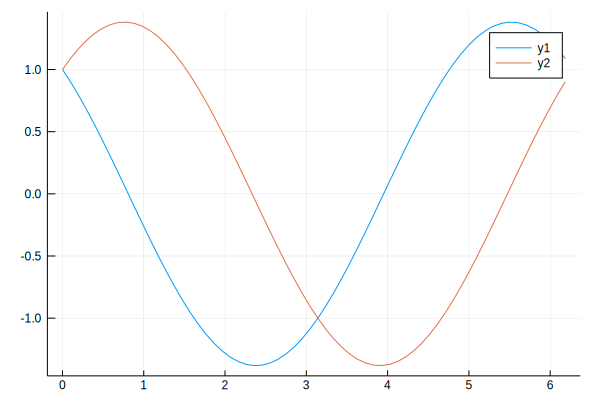

In [93]:
dataset  = 3
epsilon  = 0.1
xmin     = 0
xmax     = 2π
T        = 2π
nx       = 64
ntau     = 32
tfinal   = 0.25

data = DataSet(dataset, xmin, xmax, nx, epsilon, tfinal)

plot(data.x, real.(data.u))
plot!(data.x, real.(data.v))

In [135]:
include("src/micmac.jl")

dt = 2.0^(-3) * tfinal / 16

m = MicMac(data, ntau)

@time u, v = solve(m, dt)

 10.369776 seconds (8.37 M allocations: 1.290 GiB, 3.33% gc time)


(Complex{Float64}[-1.21468-1.05021im -1.08829-1.00116im … -1.44367-1.08039im -1.33349-1.07655im], Complex{Float64}[-0.956062+1.20309im -0.978022+1.32138im … -0.863432+0.94636im -0.917779+1.07787im])

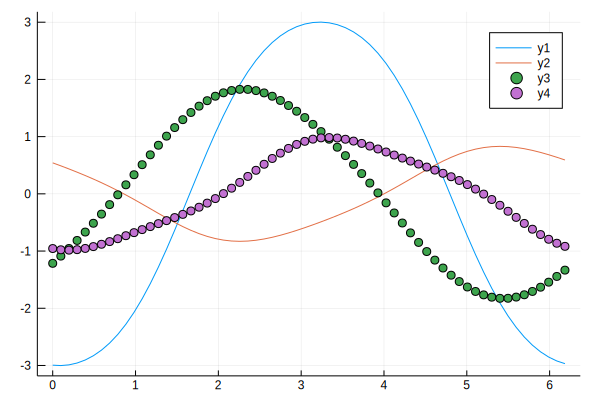

In [136]:
uref, vref = read_refdata(epsilon, dataset)
plot(data.x, real.(uref))
plot!(data.x, real.(vref))
scatter!(data.x, real.(vec(u)))
scatter!(data.x, real.(vec(v)))